# Part a Enumeration Code

#### State is the number of people left (include arrival customers) after taking action (dispatch or not dispatch)

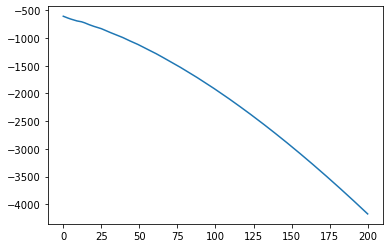

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Enumeration for part a
# no more people coming to the station when there are maximum 200 people in the station

# set up data
gamma = 0.95
K = 15
cf = 100
ch = 2
N = 200
T = 500


V = np.zeros(N+1)
V_new = np.zeros(N+1)-np.inf
# there are two actions, 0 -- not dispatch, 1 -- dispatch. 
actions = [0,1]
# number of coming customers per unit time period
incoming = [1,2,3,4,5]
for t in range(T,-1,-1):
    for s in range(N+1):
        for a in actions:
            fr = 0
            for i in incoming:
                if a == 0: 
                    # s_new is the possible next state (can not exceed 200 maximum)
                    s_new = min(s+i, N)
                    fr +=  1/5*V[s_new]
                else: # a == 1 
                    s_new = max(0,s+i-K)
                    fr +=  1/5*V[s_new]
                    
            if a == 0:
                # compute the total reward under each action
                # new arrivals do not count into cost
                sigma = -s*ch + gamma*fr
            else: # a == 1 
                sigma = -s*ch - cf + gamma*fr
            V_new[s] = max(V_new[s], sigma)
    V = V_new
    V_new = np.zeros(N+1)-np.inf

plt.plot(V)
    
    

In [2]:
print(V[0], V[-1])

-606.3813108347883 -4172.396078813836


# Part a Value iteration 

#### The definition of state is the same as above 

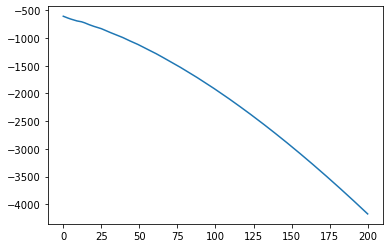

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# value iteration 
gamma = 0.95
K = 15
cf = 100
ch = 2
N = 200
T = 500
V = np.zeros(N+1)
V_new = np.zeros(N+1)-np.inf
actions = [0,1]
incoming = [1,2,3,4,5]                          

for epoch in range(10000):
    for s in range(N+1):
        for a in actions:
            fr = 0
            for i in incoming:
                if a == 0: 
                    s_new = min(s+i, N)
                    fr += 1/5*V[s_new]
                else: # a == 1 
                    s_new = max(0,s+i-K)
                    fr += 1/5*V[s_new]
                    
            if a == 0:
                sigma = -s*ch + gamma*fr
            else: # a == 1 
                sigma = -s*ch - cf + gamma*fr
            V_new[s] = max(V_new[s], sigma)
    V = V_new
    V_new = np.zeros(N+1)-np.inf

plt.plot(V)

In [4]:
print(V[0], V[-1])

-606.381310839762 -4172.396078818811


# Part a Policy Iteration

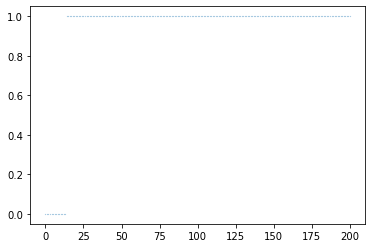

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# policy iteration 
gamma = 0.95
K = 15
cf = 100
ch = 2
N = 200
T = 500
V = np.zeros(N+1)
# give a random initial policy 
pi = np.random.randint(2, size=N+1) 
#pi = np.zeros(N+1)
V_new = np.zeros(N+1)
actions = [0,1]
incoming = [1,2,3,4,5]                          
stable = False
K = 100

while not stable:
    diff = 1
    while diff > 1e-5:
        for s in range(N+1): 
                  
            if pi[s] == 0: 
                fr = 0
                for i in incoming:
                    fr += 1/5*V[min(s+i, N)]
                V_new[s] = -s*ch + gamma*fr
                
            else: # pi[s] == 1
                fr = 0
                for i in incoming:
                    fr += 1/5*V[max(0,s+i-K)]
                V_new[s] = -s*ch - cf + gamma*fr           
                
        diff = np.linalg.norm(V_new-V)
        V = V_new.copy()
        
    stable = True
    pi_new = np.zeros(N+1) 
    for s in range(N+1): 
        prev_pis = pi[s]
        fr0 = 0
        fr1 = 0
        for i in incoming:
            fr0 += 1/5*V[min(s+i, N-1)]
            fr1 += 1/5*V[max(0,s+i-K)]
        sigma0 = -s*ch + gamma*fr0
        sigma1 = -s*ch - cf + gamma*fr1
        if sigma0 >= sigma1:
            pi[s] = 0
        else:
            pi[s] = 1
        if pi[s] != prev_pis:
            stable = False
            
plt.scatter(range(201), pi, s=0.02)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# policy iteration 
gamma = 0.95
K = 15
cf = 100
ch = 2
N = 200
V = np.zeros(N+1)
# give a random initial policy 
#pi = np.random.randint(2, size=N+1) 
pi = np.zeros(N+1)
V_new = np.zeros(N+1)
actions = [0,1]
incoming = [1,2,3,4,5]                          

K = 100

for epoch in range(100):
    for k in range(K):
        for s in range(N+1): 
            fr = 0
            for i in incoming:
                if pi[s] == 0: 
                    s_new = min(s+i, N)
                    fr += 1/5*V[s_new]
                else: # pi[s] == 1
                    s_new = max(0,s+i-K)
                    fr += 1/5*V[s_new]

            if pi[s] == 0:
                V_new[s] = -s*ch + gamma*fr
            else:
                V_new[s] = -s*ch - cf + gamma*fr
                

        V = V_new.copy()
    
    for s in range(N+1): 
        for a in actions:
            fr = 0
            for i in incoming:
                if a == 0: 
                    s_new = min(s+i, N)
                    fr += 1/5*V[s_new]
                else: # a == 1 
                    s_new = max(0,s+i-K)
                    fr += 1/5*V[s_new]
                    
            if a == 0:
                sigma1 = -s*ch + gamma*fr
            else: # a == 1 
                sigma2 = -s*ch - cf + gamma*fr
        if sigma1 >= sigma2:
            pi[s] = 0
        else:
            pi[s] = 1
plt.scatter(range(201), pi, s=0.02)
plt.show()

# Part b enumeration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


gamma = 0.95
K = 30
cf = 100
ch = np.array([1, 1.5, 2, 2.5, 3])
classes = len(ch)
N = 100
T = 500
V = np.zeros([N+1]*classes)
V_new = np.zeros([N+1]*classes)-np.inf
actions = [0,1]
incomings = []

for i1 in range(1,6):
    for i2 in range(1,6):
        for i3 in range(1,6):
            for i4 in range(1,6):
                for i5 in range(1,6):
                    incomings.append([i1,i2,i3,i4,i5])


for t in range(T,-1,-1):
    # traverse all state
    for s5 in range(N+1):
        for s4 in range(N+1):     
            for s3 in range(N+1):
                for s2 in range(N+1):
                    for s1 in range(N+1):
  
                        s = [s1,s2,s3,s4,s5]
    
                        # traverse all actions
                        for a in actions:
                            
                            fr = 0
                            
                            # traverse all possible neighber states
                            for incoming in incomings:
                                s_new = [0,0,0,0,0]
                                for idx in range(classes):
                                    s_new[idx] = s[idx]+incoming[idx]

                                if a == 0: 
                                    # if not dispatch, s_new[idx] can not exceed 100
                                    for idx in range(classes):                             
                                        s_new[idx] = min(s_new[idx], N)   
                                    fr += V[s_new[0],s_new[1],s_new[2],s_new[3],s_new[4]]* (1/5)**5 
                                    
                                else: 
                                    # if dispatch, we should send expensive customers first
                                    capacity = K
                                    for idx in range(classes):
                                        diff = s_new[idx]-capacity
                                        s_new[idx] = max(0, diff)
                                        capacity = - diff 
                                        if capacity <= 0:
                                            break  
                                    for idx in range(classes):                             
                                        s_new[idx] = min(s_new[idx], N) 
                                        
                                    fr += V[s_new[0],s_new[1],s_new[2],s_new[3],s_new[4]]* (1/5)**5 

                            if a == 0:
                                sigma = -np.array(s).dot(ch) + gamma*fr
                            else: # a == 1   
                                sigma = -np.array(s).dot(ch) - cf + gamma*fr
                                
                            V_new[s[0],s[1],s[2],s[3],s[4]] = max(V_new[s[0],s[1],s[2],s[3],s[4]], sigma)
                            
    V = V_new
    V_new = np.zeros([N+1]*classes)-np.inf

plt.plot(V[:,0,0,0,0])

# Part b value iteration

In [ ]:
# b
gamma = 0.95
K = 30
cf = 100
ch = np.array([1, 1.5, 2, 2.5, 3])
classes = len(ch)
N = 100
T = 500
V = np.zeros([N+1]*classes)
V_new = np.zeros([N+1]*classes)-np.inf
actions = [0,1]
incomings = []

for i1 in range(1,6):
    for i2 in range(1,6):
        for i3 in range(1,6):
            for i4 in range(1,6):
                for i5 in range(1,6):
                    incomings.append([i1,i2,i3,i4,i5])


for epoch in range(10000):
    # traverse all state
    for s5 in range(N+1):
        for s4 in range(N+1):     
            for s3 in range(N+1):
                for s2 in range(N+1):
                    for s1 in range(N+1):
  
                        s = [s1,s2,s3,s4,s5]
    
                        # traverse all actions
                        for a in actions:
                            
                            fr = 0
                            
                            # traverse all possible neighber states
                            for incoming in incomings:
                                s_new = [0,0,0,0,0]
                                for idx in range(classes):
                                    s_new[idx] = s[idx]+incoming[idx]

                                if a == 0: 
                                    # if not dispatch, s_new[idx] can not exceed 100
                                    for idx in range(classes):                             
                                        s_new[idx] = min(s_new[idx], N)   
                                    fr += V[s_new[0],s_new[1],s_new[2],s_new[3],s_new[4]]* (1/5)**5 
                                    
                                else: 
                                    # if dispatch, we should send expensive customers first
                                    capacity = K
                                    for idx in range(classes):
                                        diff = s_new[idx]-capacity
                                        s_new[idx] = max(0, diff)
                                        capacity = - diff 
                                        if capacity <= 0:
                                            break  
                                    for idx in range(classes):                             
                                        s_new[idx] = min(s_new[idx], N) 
                                        
                                    fr += V[s_new[0],s_new[1],s_new[2],s_new[3],s_new[4]]* (1/5)**5 

                            if a == 0:
                                sigma = -np.array(s).dot(ch) + gamma*fr
                            else: # a == 1 
                                      
                                sigma = -np.array(s).dot(ch) - cf + gamma*fr
                            V_new[s[0],s[1],s[2],s[3],s[4]] = max(V_new[s[0],s[1],s[2],s[3],s[4]], sigma)
                            
    V = V_new
    V_new = np.zeros([N+1]*classes)-np.inf

plt.plot(V[:,0,0,0,0])

# Part b policy iteration

In [ ]:
# c
gamma = 0.95
K = 30
cf = 100
ch = np.array([1, 1.5, 2, 2.5, 3])
classes = len(ch)
N = 100
T = 500
V = np.zeros([N+1]*classes)
V_new = np.zeros([N+1]*classes)-np.inf
pi = np.random.randint(2, size=[N+1]*classes)
actions = [0,1]
incomings = []

for i1 in range(1,6):
    for i2 in range(1,6):
        for i3 in range(1,6):
            for i4 in range(1,6):
                for i5 in range(1,6):
                    incomings.append([i1,i2,i3,i4,i5])
K = 1000

for epoch in range(100):
    for k in range(K):
        for s5 in range(N+1):
            for s4 in range(N+1):     
                for s3 in range(N+1):
                    for s2 in range(N+1):
                        for s1 in range(N+1):

                            s = [s1,s2,s3,s4,s5]
                            a = pi[s[0],s[1],s[2],s[3],s[4]] 
                            fr = 0

                            # traverse all possible neighber states
                            for incoming in incomings:
                                s_new = [0,0,0,0,0]
                                for idx in range(classes):
                                    s_new[idx] = s[idx]+incoming[idx]

                                if a == 0: 
                                    # if not dispatch, s_new[idx] can not exceed 100
                                    for idx in range(classes):                             
                                        s_new[idx] = min(s_new[idx], N)   
                                    fr += V[s_new[0],s_new[1],s_new[2],s_new[3],s_new[4]]* (1/5)**5 

                                else: 
                                    # if dispatch, we should send expensive customers first
                                    capacity = K
                                    for idx in range(classes):
                                        diff = s_new[idx]-capacity
                                        s_new[idx] = max(0, diff)
                                        capacity = - diff 
                                        if capacity <= 0:
                                            break  
                                    for idx in range(classes):                             
                                        s_new[idx] = min(s_new[idx], N) 

                                    fr += V[s_new[0],s_new[1],s_new[2],s_new[3],s_new[4]]* (1/5)**5 

                            if a == 0:
                                V_new[s[0],s[1],s[2],s[3],s[4]] = -np.array(s).dot(ch) + gamma*fr
                            else:
                                # if dispatch, we should send expensive customers first
                                capacity = K
                                for idx in range(classes-1,-1,-1):
                                    diff = s[idx]-capacity
                                    s[idx] = max(0, diff)
                                    capacity = - diff 
                                    if capacity <= 0:
                                        break

                                V_new[s[0],s[1],s[2],s[3],s[4]] = -np.array(s).dot(ch) - cf + gamma*fr
 
        V = V_new
        V_new = np.zeros([N+1]*classes)-np.inf
    
    
    for s5 in range(N+1):
        for s4 in range(N+1):     
            for s3 in range(N+1):
                for s2 in range(N+1):
                    for s1 in range(N+1):
                        
                        s = [s1,s2,s3,s4,s5]
                        sigma_opt = -np.inf
                        for a in [0,1]:
                            fr = 0

                            # traverse all possible neighber states
                            for incoming in incomings:
                                s_new = [0,0,0,0,0]
                                for idx in range(classes):
                                    s_new[idx] = s[idx]+incoming[idx]

                                if a == 0: 
                                    # if not dispatch, s_new[idx] can not exceed 100
                                    for idx in range(classes):                             
                                        s_new[idx] = min(s_new[idx], N)   
                                    fr += V[s_new[0],s_new[1],s_new[2],s_new[3],s_new[4]]* (1/5)**5 

                                else: 
                                    # if dispatch, we should send expensive customers first
                                    capacity = K
                                    for idx in range(classes):
                                        diff = s_new[idx]-capacity
                                        s_new[idx] = max(0, diff)
                                        capacity = - diff 
                                        if capacity <= 0:
                                            break  
                                    for idx in range(classes):                             
                                        s_new[idx] = min(s_new[idx], N) 

                                    fr += V[s_new[0],s_new[1],s_new[2],s_new[3],s_new[4]]* (1/5)**5 
                            if a == 0:
                                sigma = -np.array(s).dot(ch) + gamma*fr
                            else:
                                # if dispatch, we should send expensive customers first
                                capacity = K
                                for idx in range(classes-1,-1,-1):
                                    diff = s[idx]-capacity
                                    s[idx] = max(0, diff)
                                    capacity = - diff 
                                    if capacity <= 0:
                                        break

                                sigma = -np.array(s).dot(ch) - cf + gamma*fr   
                                
                            if sigma > sigma_opt :
                                sigma_opt = sigma
                                pi[s[0],s[1],s[2],s[3],s[4]] = a
                                  
plt.scatter(range(201), pi[0,0,0,0,:], s=0.02)
plt.show()

#### Command for part b: Using these algorithms for solving the problem will need a lot of memory, and it will take a very long time to get the result (intractable unless we do it in parallel). 